# CNN

## Fungsi dan Variabel

In [4]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1" 

import matplotlib.pyplot as plt

from Datasets.cifar10 import x_train, y_train, x_val, y_val, x_test, y_test
from Models.CNN.CNN import CNN
from Models.CNN.training.configs import (
    CONV_LAYER_VARIATIONS, FILTER_VARIATIONS, 
    KERNEL_SIZE_VARIATIONS, POOLING_VARIATIONS
)

SAVE_PATH = "Models/CNN/training"

In [11]:
def plot_loss_curves(history, title):
    """Displays validation loss and training loss per epoch"""
    
    plt.plot(history.history["loss"], label = "Train Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
def train_and_evaluate_all(variation_dict, variation_name):
    """Train and evaluate CNN models for each config in variation_dict."""
    
    print(f"\n\n=== {variation_name} Variations ===\n")
    for name, config in variation_dict.items():
        print(f"\n--- Training: {name} ---")

        # Build
        model = CNN.from_config(config)
        model.weights_dir = f"{SAVE_PATH}/weights/{variation_name}"
        model.build()

        # Train & Evaluate
        model.train(x_train, y_train, x_val, y_val)
        y_pred_probs = model.model.predict(x_test)
        model.evaluate(y_pred_probs, y_test)

        # Save weights
        model.save()

        # Log results
        print(f"{name} | Macro F1 Score: {model.f1_score:.4f}")
        plot_loss_curves(model.history, f"{name} | Training & Validation Loss")

## Training

### Jumlah Layer Konvolusi



=== ConvLayerCount Variations ===


--- Training: 1 Layer ---
Epoch 1/7
625/625 - 9s - 15ms/step - accuracy: 0.4427 - loss: 1.5626 - val_accuracy: 0.5215 - val_loss: 1.3458
Epoch 2/7
625/625 - 9s - 14ms/step - accuracy: 0.5600 - loss: 1.2475 - val_accuracy: 0.5709 - val_loss: 1.2094
Epoch 3/7
625/625 - 9s - 14ms/step - accuracy: 0.6014 - loss: 1.1406 - val_accuracy: 0.5782 - val_loss: 1.2187
Epoch 4/7
625/625 - 9s - 14ms/step - accuracy: 0.6319 - loss: 1.0537 - val_accuracy: 0.6068 - val_loss: 1.1235
Epoch 5/7
625/625 - 9s - 14ms/step - accuracy: 0.6562 - loss: 0.9931 - val_accuracy: 0.6177 - val_loss: 1.0919
Epoch 6/7
625/625 - 9s - 15ms/step - accuracy: 0.6749 - loss: 0.9327 - val_accuracy: 0.6356 - val_loss: 1.0583
Epoch 7/7
625/625 - 10s - 15ms/step - accuracy: 0.6910 - loss: 0.8839 - val_accuracy: 0.6271 - val_loss: 1.0778
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Saved weights to Models/CNN/training/weights/ConvLayerCount\1layers_filters32_kernels3_poolmax.weights.h5
1 Layer | M

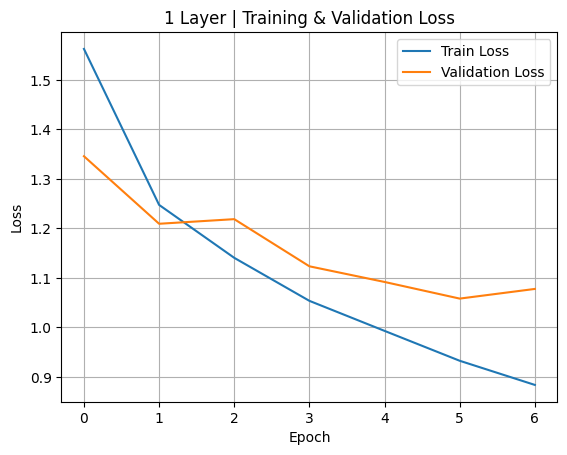


--- Training: 2 Layers ---
Epoch 1/7
625/625 - 19s - 30ms/step - accuracy: 0.4358 - loss: 1.5760 - val_accuracy: 0.5482 - val_loss: 1.2797
Epoch 2/7
625/625 - 16s - 26ms/step - accuracy: 0.5770 - loss: 1.1995 - val_accuracy: 0.5916 - val_loss: 1.1660
Epoch 3/7
625/625 - 16s - 25ms/step - accuracy: 0.6328 - loss: 1.0483 - val_accuracy: 0.6331 - val_loss: 1.0557
Epoch 4/7
625/625 - 15s - 25ms/step - accuracy: 0.6664 - loss: 0.9568 - val_accuracy: 0.6396 - val_loss: 1.0398
Epoch 5/7
625/625 - 16s - 25ms/step - accuracy: 0.6925 - loss: 0.8877 - val_accuracy: 0.6677 - val_loss: 0.9535
Epoch 6/7
625/625 - 15s - 25ms/step - accuracy: 0.7106 - loss: 0.8310 - val_accuracy: 0.6672 - val_loss: 0.9557
Epoch 7/7
625/625 - 15s - 25ms/step - accuracy: 0.7283 - loss: 0.7832 - val_accuracy: 0.6864 - val_loss: 0.9051
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Saved weights to Models/CNN/training/weights/ConvLayerCount\2layers_filters32-64_kernels3-3_poolmax.weights.h5
2 Layers | Macro F1 Score: 0.6902


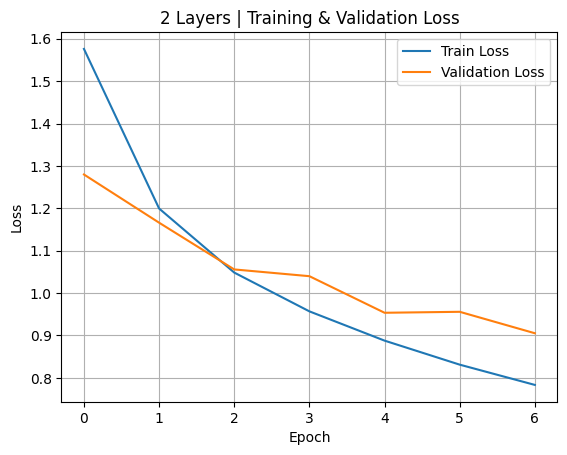


--- Training: 3 Layers ---
Epoch 1/7
625/625 - 20s - 32ms/step - accuracy: 0.4374 - loss: 1.5450 - val_accuracy: 0.5613 - val_loss: 1.2411
Epoch 2/7
625/625 - 19s - 31ms/step - accuracy: 0.6027 - loss: 1.1250 - val_accuracy: 0.6371 - val_loss: 1.0347
Epoch 3/7
625/625 - 20s - 32ms/step - accuracy: 0.6670 - loss: 0.9521 - val_accuracy: 0.6507 - val_loss: 0.9842
Epoch 4/7
625/625 - 20s - 33ms/step - accuracy: 0.7073 - loss: 0.8397 - val_accuracy: 0.6816 - val_loss: 0.9220
Epoch 5/7
625/625 - 19s - 31ms/step - accuracy: 0.7359 - loss: 0.7563 - val_accuracy: 0.7068 - val_loss: 0.8435
Epoch 6/7
625/625 - 19s - 31ms/step - accuracy: 0.7660 - loss: 0.6788 - val_accuracy: 0.7152 - val_loss: 0.8200
Epoch 7/7
625/625 - 19s - 30ms/step - accuracy: 0.7849 - loss: 0.6168 - val_accuracy: 0.7263 - val_loss: 0.8154
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Saved weights to Models/CNN/training/weights/ConvLayerCount\3layers_filters32-64-128_kernels3-3-3_poolmax.weights.h5
3 Layers | Macro F1 Score: 0.7

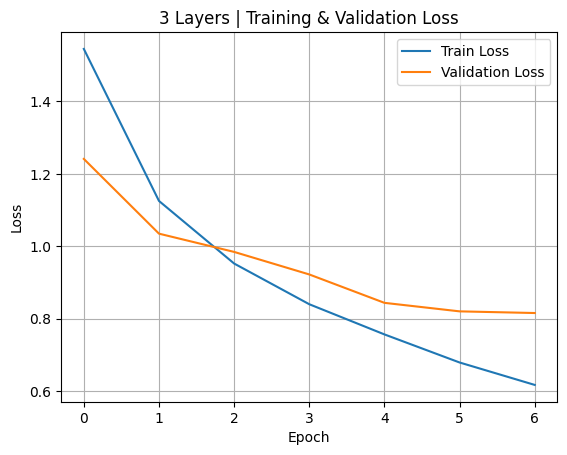

In [13]:
train_and_evaluate_all(CONV_LAYER_VARIATIONS, "ConvLayerCount")

### Banyak Filter



=== FilterSize Variations ===


--- Training: Filters 16-32 ---
Epoch 1/7
625/625 - 11s - 17ms/step - accuracy: 0.4067 - loss: 1.6466 - val_accuracy: 0.4907 - val_loss: 1.4381
Epoch 2/7
625/625 - 10s - 17ms/step - accuracy: 0.5280 - loss: 1.3170 - val_accuracy: 0.5530 - val_loss: 1.2587
Epoch 3/7
625/625 - 10s - 16ms/step - accuracy: 0.5816 - loss: 1.1785 - val_accuracy: 0.5949 - val_loss: 1.1524
Epoch 4/7
625/625 - 10s - 15ms/step - accuracy: 0.6203 - loss: 1.0844 - val_accuracy: 0.6096 - val_loss: 1.1085
Epoch 5/7
625/625 - 10s - 15ms/step - accuracy: 0.6482 - loss: 1.0040 - val_accuracy: 0.6343 - val_loss: 1.0445
Epoch 6/7
625/625 - 9s - 15ms/step - accuracy: 0.6641 - loss: 0.9567 - val_accuracy: 0.6551 - val_loss: 0.9928
Epoch 7/7
625/625 - 10s - 15ms/step - accuracy: 0.6831 - loss: 0.9066 - val_accuracy: 0.6582 - val_loss: 0.9920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Saved weights to Models/CNN/training/weights/FilterSize\2layers_filters16-32_kernels3-3_poolmax.weights.h5
Fil

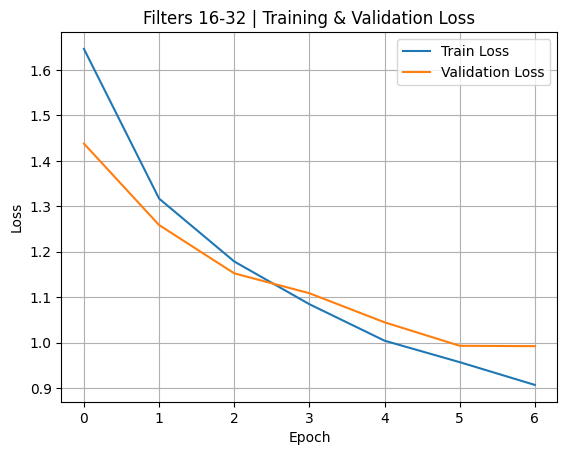


--- Training: Filters 32-64 ---
Epoch 1/7
625/625 - 16s - 26ms/step - accuracy: 0.4640 - loss: 1.4960 - val_accuracy: 0.5661 - val_loss: 1.2253
Epoch 2/7
625/625 - 17s - 27ms/step - accuracy: 0.6010 - loss: 1.1405 - val_accuracy: 0.6307 - val_loss: 1.0657
Epoch 3/7
625/625 - 19s - 30ms/step - accuracy: 0.6527 - loss: 0.9892 - val_accuracy: 0.6579 - val_loss: 0.9736
Epoch 4/7
625/625 - 17s - 28ms/step - accuracy: 0.6851 - loss: 0.9029 - val_accuracy: 0.6744 - val_loss: 0.9359
Epoch 5/7
625/625 - 16s - 26ms/step - accuracy: 0.7096 - loss: 0.8272 - val_accuracy: 0.6886 - val_loss: 0.9012
Epoch 6/7
625/625 - 16s - 26ms/step - accuracy: 0.7332 - loss: 0.7614 - val_accuracy: 0.6896 - val_loss: 0.8940
Epoch 7/7
625/625 - 17s - 27ms/step - accuracy: 0.7503 - loss: 0.7074 - val_accuracy: 0.6970 - val_loss: 0.8905
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Saved weights to Models/CNN/training/weights/FilterSize\2layers_filters32-64_kernels3-3_poolmax.weights.h5
Filters 32-64 | Macro F1 Score: 0.6

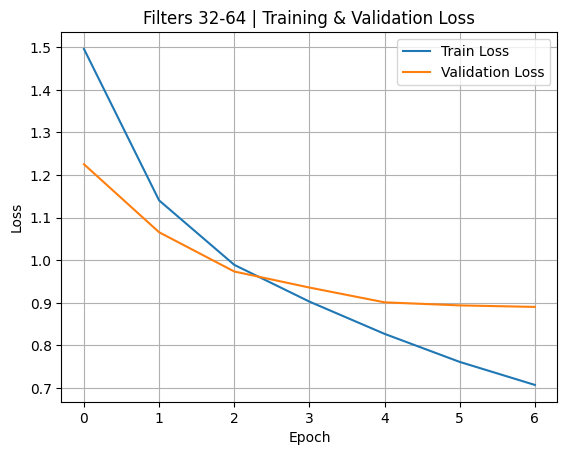


--- Training: Filters 64-128 ---
Epoch 1/7
625/625 - 31s - 49ms/step - accuracy: 0.4669 - loss: 1.4811 - val_accuracy: 0.5782 - val_loss: 1.1912
Epoch 2/7
625/625 - 30s - 47ms/step - accuracy: 0.6146 - loss: 1.0982 - val_accuracy: 0.6396 - val_loss: 1.0358
Epoch 3/7
625/625 - 31s - 49ms/step - accuracy: 0.6723 - loss: 0.9428 - val_accuracy: 0.6697 - val_loss: 0.9416
Epoch 4/7
625/625 - 30s - 47ms/step - accuracy: 0.7053 - loss: 0.8469 - val_accuracy: 0.6708 - val_loss: 0.9600
Epoch 5/7
625/625 - 30s - 47ms/step - accuracy: 0.7357 - loss: 0.7625 - val_accuracy: 0.6907 - val_loss: 0.8928
Epoch 6/7
625/625 - 30s - 48ms/step - accuracy: 0.7606 - loss: 0.6909 - val_accuracy: 0.7005 - val_loss: 0.8749
Epoch 7/7
625/625 - 29s - 46ms/step - accuracy: 0.7793 - loss: 0.6294 - val_accuracy: 0.7021 - val_loss: 0.8823
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Saved weights to Models/CNN/training/weights/FilterSize\2layers_filters64-128_kernels3-3_poolmax.weights.h5
Filters 64-128 | Macro F1 Score: 

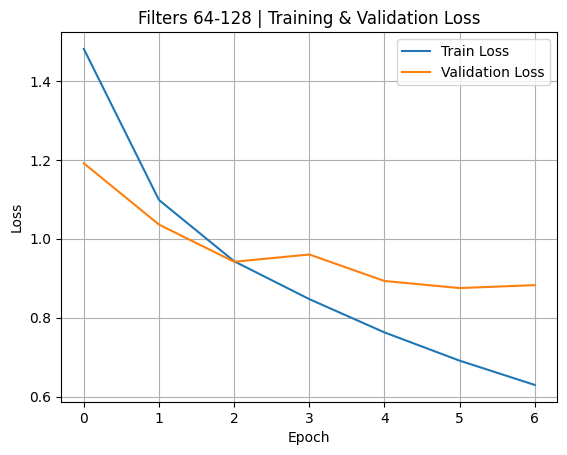

In [14]:
train_and_evaluate_all(FILTER_VARIATIONS, "FilterSize")

### Ukuran Filter



=== KernelSize Variations ===


--- Training: Kernel 3x3 ---
Epoch 1/7
625/625 - 16s - 26ms/step - accuracy: 0.4410 - loss: 1.5460 - val_accuracy: 0.5506 - val_loss: 1.2702
Epoch 2/7
625/625 - 15s - 23ms/step - accuracy: 0.5872 - loss: 1.1770 - val_accuracy: 0.6127 - val_loss: 1.1004
Epoch 3/7
625/625 - 14s - 23ms/step - accuracy: 0.6383 - loss: 1.0367 - val_accuracy: 0.6359 - val_loss: 1.0294
Epoch 4/7
625/625 - 15s - 23ms/step - accuracy: 0.6727 - loss: 0.9419 - val_accuracy: 0.6596 - val_loss: 0.9791
Epoch 5/7
625/625 - 15s - 23ms/step - accuracy: 0.6970 - loss: 0.8661 - val_accuracy: 0.6767 - val_loss: 0.9359
Epoch 6/7
625/625 - 14s - 23ms/step - accuracy: 0.7199 - loss: 0.8093 - val_accuracy: 0.6923 - val_loss: 0.8944
Epoch 7/7
625/625 - 15s - 23ms/step - accuracy: 0.7358 - loss: 0.7603 - val_accuracy: 0.6990 - val_loss: 0.8854
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Saved weights to Models/CNN/training/weights/KernelSize\2layers_filters32-64_kernels3-3_poolmax.weights.h5
Kerne

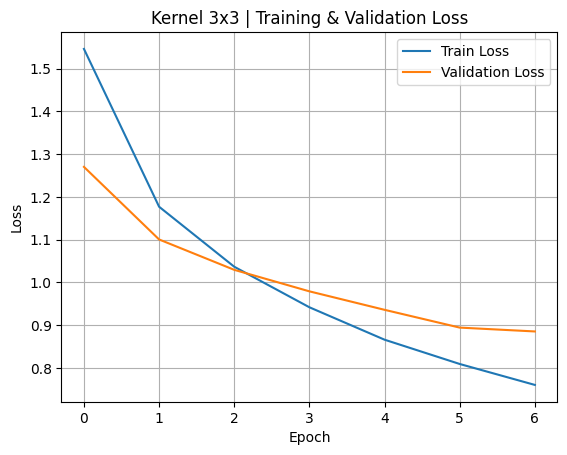


--- Training: Kernel 5x5 ---
Epoch 1/7
625/625 - 23s - 36ms/step - accuracy: 0.4263 - loss: 1.5838 - val_accuracy: 0.5338 - val_loss: 1.3168
Epoch 2/7
625/625 - 21s - 34ms/step - accuracy: 0.5703 - loss: 1.2201 - val_accuracy: 0.6026 - val_loss: 1.1377
Epoch 3/7
625/625 - 21s - 34ms/step - accuracy: 0.6267 - loss: 1.0666 - val_accuracy: 0.6357 - val_loss: 1.0416
Epoch 4/7
625/625 - 21s - 34ms/step - accuracy: 0.6689 - loss: 0.9499 - val_accuracy: 0.6603 - val_loss: 0.9790
Epoch 5/7
625/625 - 21s - 34ms/step - accuracy: 0.6972 - loss: 0.8667 - val_accuracy: 0.6699 - val_loss: 0.9431
Epoch 6/7
625/625 - 21s - 34ms/step - accuracy: 0.7194 - loss: 0.8093 - val_accuracy: 0.6884 - val_loss: 0.9024
Epoch 7/7
625/625 - 21s - 34ms/step - accuracy: 0.7396 - loss: 0.7517 - val_accuracy: 0.6854 - val_loss: 0.9067
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Saved weights to Models/CNN/training/weights/KernelSize\2layers_filters32-64_kernels5-5_poolmax.weights.h5
Kernel 5x5 | Macro F1 Score: 0.6742


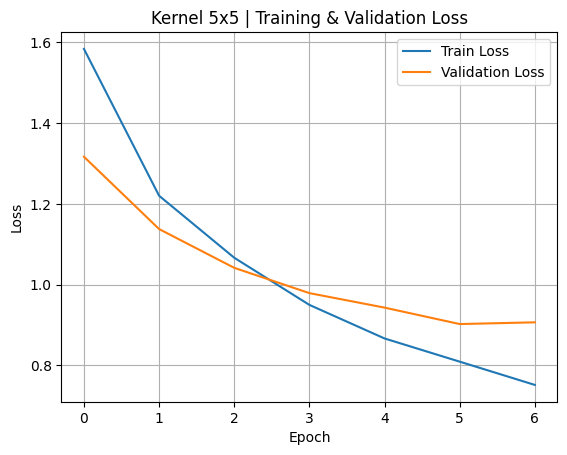


--- Training: Kernel 7x7 ---
Epoch 1/7
625/625 - 33s - 52ms/step - accuracy: 0.4124 - loss: 1.6196 - val_accuracy: 0.5130 - val_loss: 1.3557
Epoch 2/7
625/625 - 32s - 51ms/step - accuracy: 0.5601 - loss: 1.2412 - val_accuracy: 0.5881 - val_loss: 1.1559
Epoch 3/7
625/625 - 32s - 51ms/step - accuracy: 0.6198 - loss: 1.0818 - val_accuracy: 0.6265 - val_loss: 1.0722
Epoch 4/7
625/625 - 32s - 51ms/step - accuracy: 0.6603 - loss: 0.9695 - val_accuracy: 0.6387 - val_loss: 1.0532
Epoch 5/7
625/625 - 32s - 51ms/step - accuracy: 0.6908 - loss: 0.8877 - val_accuracy: 0.6580 - val_loss: 0.9950
Epoch 6/7
625/625 - 31s - 50ms/step - accuracy: 0.7125 - loss: 0.8195 - val_accuracy: 0.6579 - val_loss: 1.0034
Epoch 7/7
625/625 - 31s - 50ms/step - accuracy: 0.7346 - loss: 0.7513 - val_accuracy: 0.6697 - val_loss: 0.9761
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Saved weights to Models/CNN/training/weights/KernelSize\2layers_filters32-64_kernels7-7_poolmax.weights.h5
Kernel 7x7 | Macro F1 Score: 0.6768


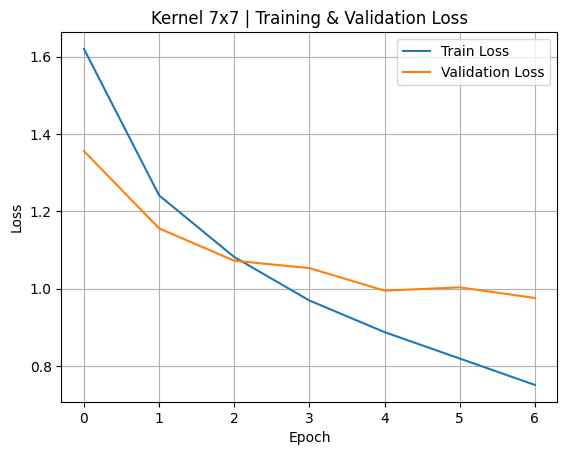

In [15]:
train_and_evaluate_all(KERNEL_SIZE_VARIATIONS, "KernelSize")

### Tipe Pooling



=== PoolingType Variations ===


--- Training: Max Pooling ---
Epoch 1/7
625/625 - 16s - 25ms/step - accuracy: 0.4358 - loss: 1.5610 - val_accuracy: 0.5492 - val_loss: 1.2802
Epoch 2/7
625/625 - 14s - 22ms/step - accuracy: 0.5786 - loss: 1.1968 - val_accuracy: 0.5827 - val_loss: 1.1601
Epoch 3/7
625/625 - 14s - 23ms/step - accuracy: 0.6312 - loss: 1.0522 - val_accuracy: 0.6366 - val_loss: 1.0325
Epoch 4/7
625/625 - 14s - 23ms/step - accuracy: 0.6679 - loss: 0.9597 - val_accuracy: 0.6617 - val_loss: 0.9773
Epoch 5/7
625/625 - 14s - 23ms/step - accuracy: 0.6918 - loss: 0.8875 - val_accuracy: 0.6661 - val_loss: 0.9469
Epoch 6/7
625/625 - 14s - 23ms/step - accuracy: 0.7126 - loss: 0.8321 - val_accuracy: 0.6770 - val_loss: 0.9369
Epoch 7/7
625/625 - 14s - 23ms/step - accuracy: 0.7294 - loss: 0.7820 - val_accuracy: 0.6813 - val_loss: 0.9225
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Saved weights to Models/CNN/training/weights/PoolingType\2layers_filters32-64_kernels3-3_poolmax.weights.h5
Ma

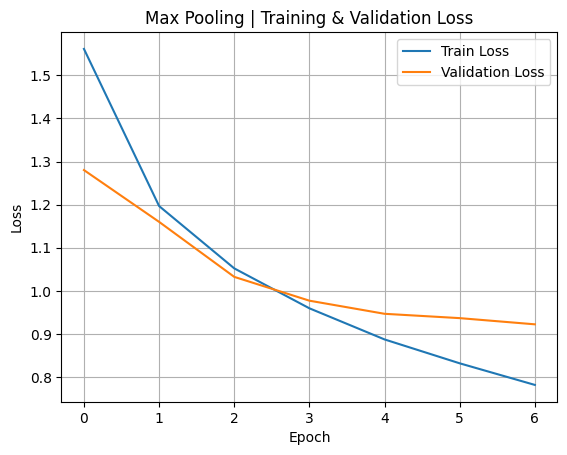


--- Training: Avg Pooling ---
Epoch 1/7
625/625 - 15s - 24ms/step - accuracy: 0.4180 - loss: 1.6207 - val_accuracy: 0.5162 - val_loss: 1.3563
Epoch 2/7
625/625 - 14s - 23ms/step - accuracy: 0.5466 - loss: 1.2785 - val_accuracy: 0.5859 - val_loss: 1.1890
Epoch 3/7
625/625 - 14s - 23ms/step - accuracy: 0.5994 - loss: 1.1379 - val_accuracy: 0.5946 - val_loss: 1.1410
Epoch 4/7
625/625 - 14s - 23ms/step - accuracy: 0.6310 - loss: 1.0420 - val_accuracy: 0.6318 - val_loss: 1.0505
Epoch 5/7
625/625 - 14s - 23ms/step - accuracy: 0.6596 - loss: 0.9670 - val_accuracy: 0.6557 - val_loss: 0.9904
Epoch 6/7
625/625 - 14s - 23ms/step - accuracy: 0.6781 - loss: 0.9128 - val_accuracy: 0.6586 - val_loss: 0.9755
Epoch 7/7
625/625 - 14s - 23ms/step - accuracy: 0.6953 - loss: 0.8663 - val_accuracy: 0.6654 - val_loss: 0.9598
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Saved weights to Models/CNN/training/weights/PoolingType\2layers_filters32-64_kernels3-3_poolaverage.weights.h5
Avg Pooling | Macro F1 Score: 0.

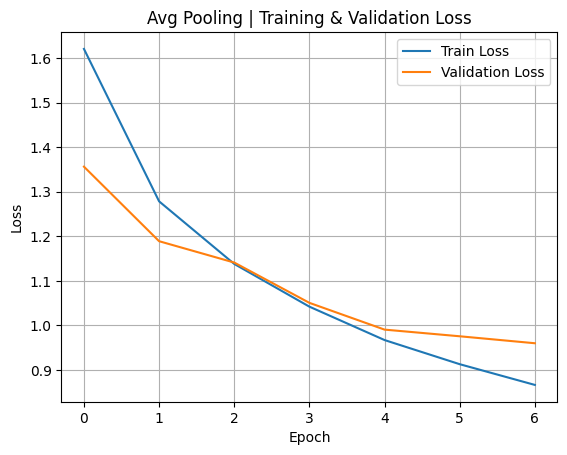

In [16]:
train_and_evaluate_all(POOLING_VARIATIONS, "PoolingType")

## Forward Propagation

In [1]:
def compare_scratch_keras_cnn():
    # Build CNN
    cnn = CNN.from_config(CONV_LAYER_VARIATIONS["3 Layers"])
    cnn.build()

    # Load Weights
    cnn.load("ConvLayerCount/3layers_filters32-64-128_kernels3-3-3_poolmax.weights.h5")

    # Forward prop
    output_scratch = cnn.forward_scratch(x_test)
    output_keras = cnn.model.predict(x_test)
    
    # Evaluate
    cnn.evaluate(output_scratch, y_test)
    score_scratch = cnn.f1_score

    cnn.evaluate(output_keras, y_test)
    score_keras = cnn.f1_score

    # Output
    print(f"From Scratch | F1-Score: {score_scratch}")
    print(f"Keras | F1-Score: {score_keras}")

In [5]:
compare_scratch_keras_cnn()

c:\Users\DIERO PURNAMA\Desktop\PR\Tubes2_ML\venv\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loaded weights from Models/CNN/training/weights\ConvLayerCount/3layers_filters32-64-128_kernels3-3-3_poolmax.weights.h5


Forward Propagation: 100%|███████████████| 10000/10000 [01:32<00:00, 107.66it/s]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
From Scratch | F1-Score: 0.7240916145678532
Keras | F1-Score: 0.7240916145678532
